## Clustering Demonstration
We will use k-means clustering to show how clustering works, though several other clustering methods exist. The key hyper-parameter associated with k-means is the value $k$ which specifies the number of clusters.

In [76]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

#### Simple k-Means Demo
We first generate some data with four known clusters

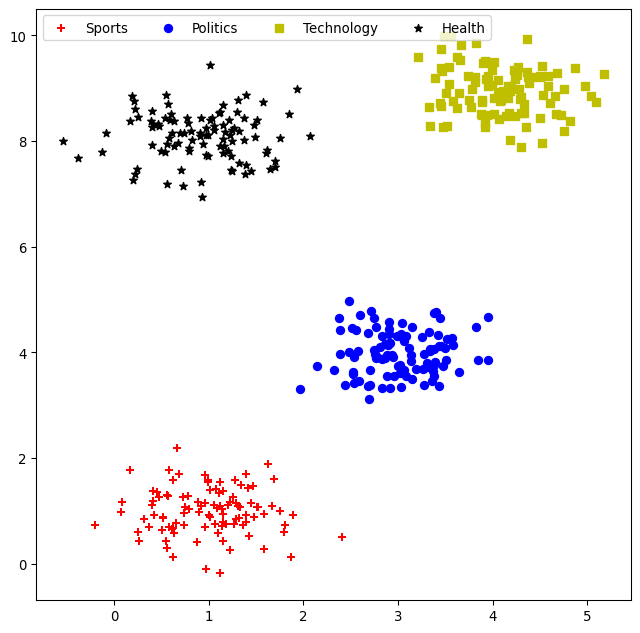

In [80]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mu1 = np.array([1,1])
mu2 = np.array([3,4])
mu3 = np.array([4,9])
mu4 = np.array([1,8])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.zeros([4*n,1])
y[n:2*n] = 1
y[2*n:3*n] = 2
y[3*n:4*n] = 3
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b',marker='o')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='y',marker='s')
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1],c='k',marker='*')

plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

Stack all data together and select four random cluster centers

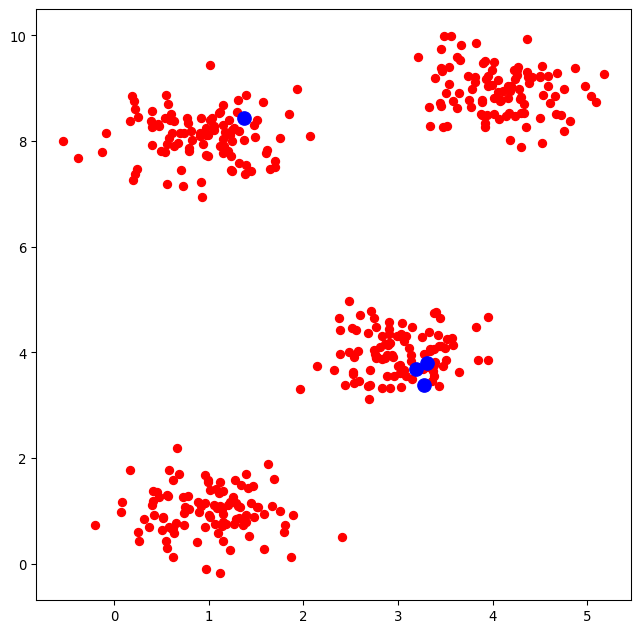

In [81]:
k = 4
r = np.random.permutation(X.shape[0])
init_centroids = X[r[0:k],:]
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)


Assign points to the closest cluster and recompute centroids. Iterate until converged. Notice how quickly k-means converges regardless of the initial conditions. However, this might not always be true.

Converged: True, At Iteration Number: 8


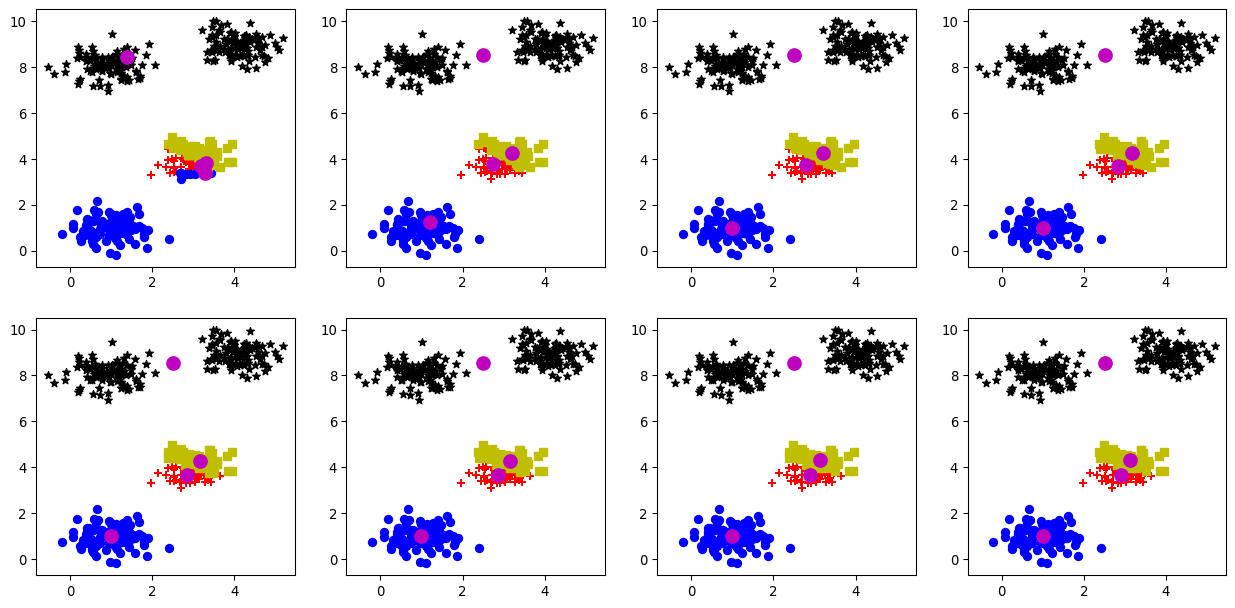

In [82]:
centroids = init_centroids
converged = False
iteration_count = 0  # Initialize iteration count
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')

for iters in range(16):
    iteration_count += 1  # Increment iteration count
    distances = np.zeros((X.shape[0], k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j, i] = np.sqrt(np.sum((X[j, :] - centroids[i, :])**2))
    assigned_cluster = np.argmin(distances, axis=1)

    # Plot the clusters and centroids
    ax = fig.add_subplot(4, 4, iters + 1)
    ax.scatter(X[np.where(assigned_cluster == 0)[0], 0], X[np.where(assigned_cluster == 0)[0], 1], c='r', marker='+')
    ax.scatter(X[np.where(assigned_cluster == 1)[0], 0], X[np.where(assigned_cluster == 1)[0], 1], c='b', marker='o')
    ax.scatter(X[np.where(assigned_cluster == 2)[0], 0], X[np.where(assigned_cluster == 2)[0], 1], c='y', marker='s')
    ax.scatter(X[np.where(assigned_cluster == 3)[0], 0], X[np.where(assigned_cluster == 3)[0], 1], c='k', marker='*')
    ax.scatter(centroids[:, 0], centroids[:, 1], c='m', marker='o', s=100)

    # recompute centroids
    new_centroids = centroids.copy()
    for i in range(k):
        new_centroids[i, :] = np.mean(X[np.where(assigned_cluster == i)[0], :], axis=0)

    # Check for convergence
    if np.allclose(new_centroids, centroids, atol=1e-6):  # Use a tolerance for comparison
        converged = True
        break

    # Update centroids
    centroids = new_centroids

print(f"Converged: {converged}, At Iteration Number: {iteration_count}")
#centroids

Your first task is to use the same data points and run the provided version of code 10 times for 10 random choices of 4 centroids. 
Record the number of iterations required by the algorithm to converge at each choice. Keep maximum number of iterations to 16.

In [83]:
seed_values = [22, 32, 42, 19, 18, 176, 24, 84, 39, 47]  
results = []  

for run, seed in enumerate(seed_values):  
    print(f"Run {run + 1} with seed {seed}:")
    np.random.seed(seed)  # Set the random seed
    r = np.random.permutation(X.shape[0])
    init_centroids = X[r[0:k], :]
    centroids = init_centroids
    converged = False
    iteration_count = 0  # Reset iteration count
    
    for iters in range(16):
        iteration_count += 1  # Increment iteration count
        distances = np.zeros((X.shape[0], k))
        for i in range(k):
            for j in range(X.shape[0]):
                distances[j, i] = np.sqrt(np.sum((X[j, :] - centroids[i, :])**2))
        assigned_cluster = np.argmin(distances, axis=1)
        
        new_centroids = centroids.copy()
        for i in range(k):
            new_centroids[i, :] = np.mean(X[np.where(assigned_cluster == i)[0], :], axis=0)
        
        if np.allclose(new_centroids, centroids, atol=1e-6):  
            converged = True
            break
        centroids = new_centroids
    
    print(f"Converged: {converged}, At Iteration Number: {iteration_count}")
    results.append(iteration_count)  

Run 1 with seed 22:
Converged: True, At Iteration Number: 10
Run 2 with seed 32:
Converged: True, At Iteration Number: 3
Run 3 with seed 42:
Converged: True, At Iteration Number: 5
Run 4 with seed 19:
Converged: True, At Iteration Number: 4
Run 5 with seed 18:
Converged: True, At Iteration Number: 12
Run 6 with seed 176:
Converged: True, At Iteration Number: 7
Run 7 with seed 24:
Converged: True, At Iteration Number: 11
Run 8 with seed 84:
Converged: True, At Iteration Number: 7
Run 9 with seed 39:
Converged: True, At Iteration Number: 5
Run 10 with seed 47:
Converged: True, At Iteration Number: 4


1.	Choose first centroid randomly, choose second farthest away from first, third farthest away from first and second, and so on.  (2.5 points)
2.	Apply a method to store the initial choice of centroids to ensure that the experiments are reproducible. (2.5 points)

Centroids have been saved to 'init_centroids.pkl'
Centroids are:
 [[ 3.81447065  9.11797161]
 [ 1.11546096 -0.1777632 ]
 [ 3.57869684  4.14133352]
 [-0.5399379   7.99961181]]


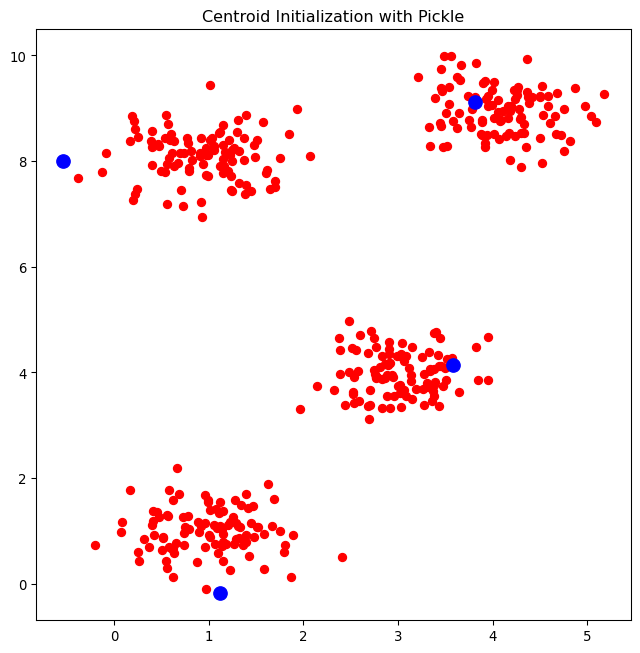

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

k = 4
np.random.seed(12)  
# Choosing the first centroid randomly
r = np.random.permutation(X.shape[0])
init_centroids = [X[r[0], :]]  # Start with the first centroid

# selecting the farthest point as the next centroid
for _ in range(1, k):  
    distances = np.array([min(np.linalg.norm(x - c) for c in init_centroids) for x in X])
    next_centroid = X[np.argmax(distances)]  
    init_centroids.append(next_centroid)  

init_centroids = np.array(init_centroids)  # Convert to NumPy array

# Save the centroids to a pickle file
with open("init_centroids.pkl", "wb") as f:
    pickle.dump(init_centroids, f)
print("Centroids have been saved to 'init_centroids.pkl'")

# Load the centroids back
with open("init_centroids.pkl", "rb") as f:
    loaded_centroids = pickle.load(f)
print("Centroids are:\n", loaded_centroids)

# Visualization
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], c='r')
plt.scatter(loaded_centroids[:, 0], loaded_centroids[:, 1], c='b', marker='o', s=100)
plt.title("Centroid Initialization with Pickle")
plt.show()

Converged: True, At Iteration Number: 3


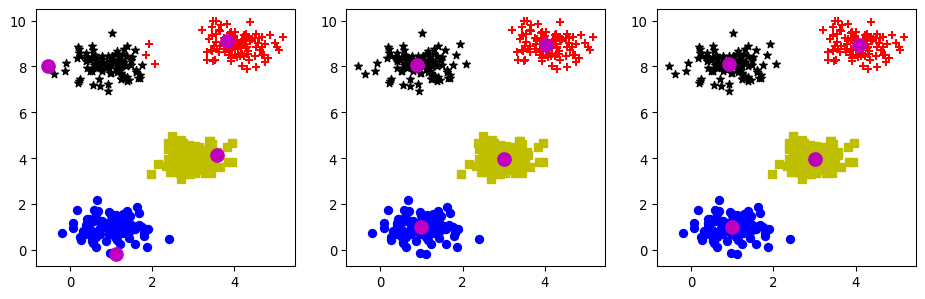

In [85]:
centroids = loaded_centroids  # Start with centroids loaded from pickle
converged = False
iteration_count = 0  # Initialize iteration count
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')

for iters in range(16):
    iteration_count += 1  # Increment iteration count
    distances = np.zeros((X.shape[0], k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j, i] = np.sqrt(np.sum((X[j, :] - centroids[i, :])**2))
    assigned_cluster = np.argmin(distances, axis=1)

    # Plot the clusters and centroids
    ax = fig.add_subplot(4, 4, iters + 1)
    ax.scatter(X[np.where(assigned_cluster == 0)[0], 0], X[np.where(assigned_cluster == 0)[0], 1], c='r', marker='+')
    ax.scatter(X[np.where(assigned_cluster == 1)[0], 0], X[np.where(assigned_cluster == 1)[0], 1], c='b', marker='o')
    ax.scatter(X[np.where(assigned_cluster == 2)[0], 0], X[np.where(assigned_cluster == 2)[0], 1], c='y', marker='s')
    ax.scatter(X[np.where(assigned_cluster == 3)[0], 0], X[np.where(assigned_cluster == 3)[0], 1], c='k', marker='*')
    ax.scatter(centroids[:, 0], centroids[:, 1], c='m', marker='o', s=100)

    # Compute new centroids
    new_centroids = centroids.copy()
    for i in range(k):
        new_centroids[i, :] = np.mean(X[np.where(assigned_cluster == i)[0], :], axis=0)

    # Check for convergence
    if np.allclose(new_centroids, centroids, atol=1e-6):  # Use a tolerance for comparison
        converged = True
        break

    # Update centroids
    centroids = new_centroids

print(f"Converged: {converged}, At Iteration Number: {iteration_count}")


Next, you will repeat the experiment with the modifications mentioned above for 10 times also for 4 centroids. 
Calculate the number of iterations needed for the algorithm to converge for the same dataset.  

In [86]:
# Run the experiment with different seeds
seed_values = [22, 32, 42, 19, 18, 176, 24, 84, 39, 47]  
results = []

for run, seed in enumerate(seed_values):
    print(f"Run {run + 1} with seed {seed}:")
    np.random.seed(seed)  
    r = np.random.permutation(X.shape[0])
    init_centroids = [X[r[0], :]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in init_centroids) for x in X])
        next_centroid = X[np.argmax(distances)]
        init_centroids.append(next_centroid)
    centroids = np.array(init_centroids)
    
    converged = False
    iteration_count = 0  # Reset iteration count

    for iters in range(16):
        iteration_count += 1  # Increment iteration count
        distances = np.zeros((X.shape[0], k))
        for i in range(k):
            for j in range(X.shape[0]):
                distances[j, i] = np.linalg.norm(X[j, :] - centroids[i, :])  # Euclidean distance
        assigned_cluster = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = centroids.copy()
        for i in range(k):
            cluster_points = X[np.where(assigned_cluster == i)[0], :]
            if cluster_points.size > 0: 
                new_centroids[i, :] = np.mean(cluster_points, axis=0)

        # Check for convergence
        if np.allclose(new_centroids, centroids, atol=1e-6):  
            converged = True
            break

        centroids = new_centroids

    print(f"Converged: {converged}, At Iteration Number: {iteration_count}")
    results.append(iteration_count)

Run 1 with seed 22:
Converged: True, At Iteration Number: 3
Run 2 with seed 32:
Converged: True, At Iteration Number: 3
Run 3 with seed 42:
Converged: True, At Iteration Number: 3
Run 4 with seed 19:
Converged: True, At Iteration Number: 3
Run 5 with seed 18:
Converged: True, At Iteration Number: 3
Run 6 with seed 176:
Converged: True, At Iteration Number: 3
Run 7 with seed 24:
Converged: True, At Iteration Number: 3
Run 8 with seed 84:
Converged: True, At Iteration Number: 3
Run 9 with seed 39:
Converged: True, At Iteration Number: 2
Run 10 with seed 47:
Converged: True, At Iteration Number: 3
